# Proyecto Semestral

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4895752%2F391fac1718d81b6c7cf0b53eb231d562%2Finbox_4895752_5e4735cb769c6be5f5872a052d0007e2_841520521_preview_20170113163124_2.jpg?generation=1597574096430659&alt=media)

## Integrantes
* Felipe Miranda Rebolledo
* 

## Entrega 1

### Importación de Librerías

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

### Carga y visualización de Data

In [3]:
# Cargamos la data
data_frame = pd.read_csv("docs/demo_round_traces.csv", sep=";") # Cargamos el archivo csv
data_frame

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,...,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,...,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,...,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,...,0,0,0,4950,27100,1,0,1,0,984575.199373


## Pregunta 1:
**¿Cuál es el mapa con mayor cantidad de tiros a la cabeza y de qué equipo fue?**

In [4]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", "InternalTeamId", "MatchHeadshots"]]
column_select

,Map,Team,InternalTeamId,MatchHeadshots
0,de_inferno,Terrorist,1,0
1,de_inferno,Terrorist,1,0
2,de_inferno,Terrorist,1,0
3,de_inferno,Terrorist,1,0
4,de_inferno,Terrorist,1,0
...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,2
79153,de_mirage,CounterTerrorist,2,3
79154,de_mirage,CounterTerrorist,2,3
79155,de_mirage,CounterTerrorist,2,0


In [5]:
# Obtenemos el promedio de headshots por mapa
headshots_mean = column_select.groupby("Map")["MatchHeadshots"].mean()
# Ver dos decimales
headshots_mean = headshots_mean.round(2)
headshots_mean

Map
de_dust2      3.89
de_inferno    3.96
de_mirage     3.63
de_nuke       3.94
Name: MatchHeadshots, dtype: float64

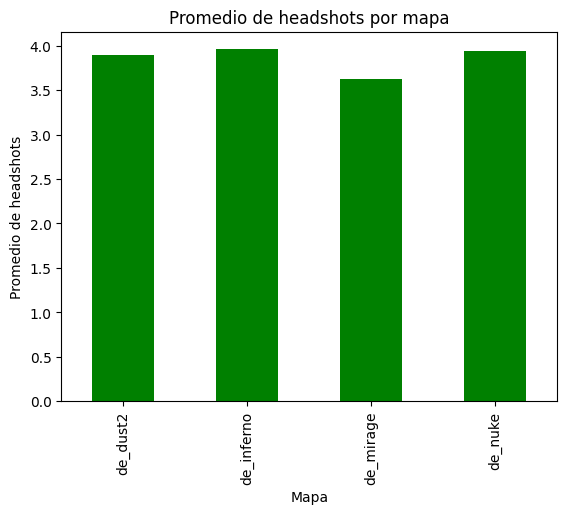

In [6]:
# Graficamos el promedio de headshots por mapa
headshots_mean.plot(kind="bar", color="green")
plt.title("Promedio de headshots por mapa")
plt.ylabel("Promedio de headshots")
plt.xlabel("Mapa")
plt.show()

Podemos notar que el mapa donde más tiros a la cabeza se realizan es en **"de_inferno"**

In [7]:
# Saber que equipo da mas headshots en el mapa de inferno
inferno = column_select[column_select["Map"] == "de_inferno"]
inferno = inferno.groupby("Team")["MatchHeadshots"].mean()
inferno = inferno.round(2)
inferno

Team
CounterTerrorist    4.04
Terrorist           3.87
Name: MatchHeadshots, dtype: float64

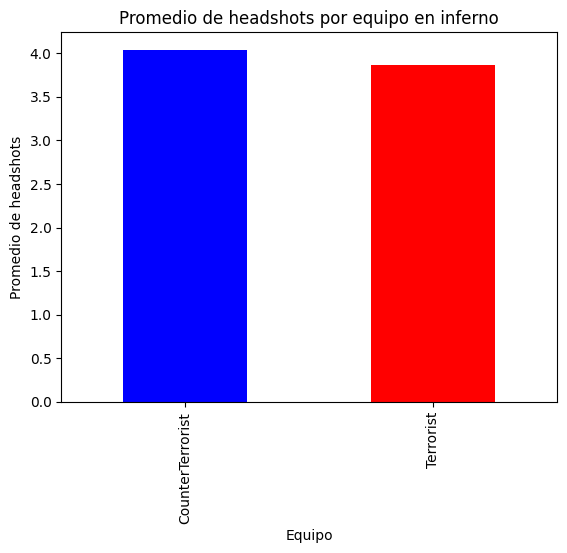

In [8]:
# Graficamos el promedio de headshots por equipo en el mapa de inferno
set_color = ["blue", "red"]
inferno.plot(kind="bar", color=set_color)
plt.title("Promedio de headshots por equipo en inferno")
plt.ylabel("Promedio de headshots")
plt.xlabel("Equipo")
plt.show()

**Respuesta:** Podemos ver que el mapa en el que más Headshots se realizan es en el **"de_inferno"** y el equipo quien los realiza es el **"CounterTerrorist"**

## Pregunta 2:
* ¿En que mapa se suele ocupar más el Sniper Rifle, cual es el equipo que opta por usar el arma?

In [9]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", "MatchKills", "PrimarySniperRifle"]]
column_select

,Map,Team,MatchKills,PrimarySniperRifle
0,de_inferno,Terrorist,0,0.0
1,de_inferno,Terrorist,0,0.0
2,de_inferno,Terrorist,0,0.0
3,de_inferno,Terrorist,0,0.0
4,de_inferno,Terrorist,0,0.0
...,...,...,...,...
79152,de_mirage,CounterTerrorist,4,0.0
79153,de_mirage,CounterTerrorist,8,0.0
79154,de_mirage,CounterTerrorist,5,0.0
79155,de_mirage,CounterTerrorist,1,1.0


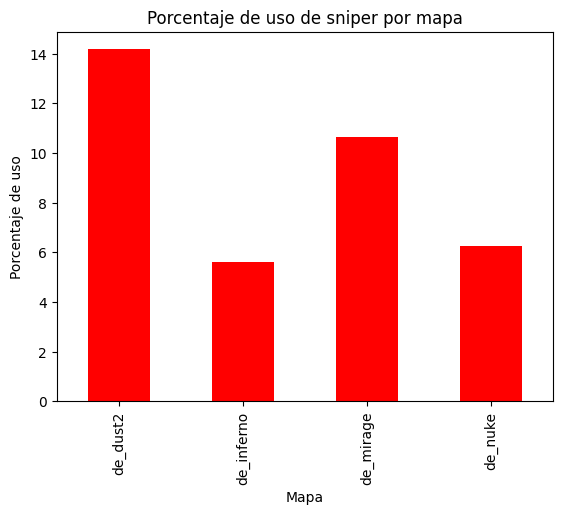

In [10]:
# En que mapa se utilizo mas el sniper
sniper = column_select.groupby("Map")["PrimarySniperRifle"].mean()

# Lo convertimos a porcentaje
sniper = sniper * 100
# Grafiacamos el porcentaje de uso de sniper por mapa
sniper.plot(kind="bar", color="red")
plt.title("Porcentaje de uso de sniper por mapa")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Mapa")
plt.show()

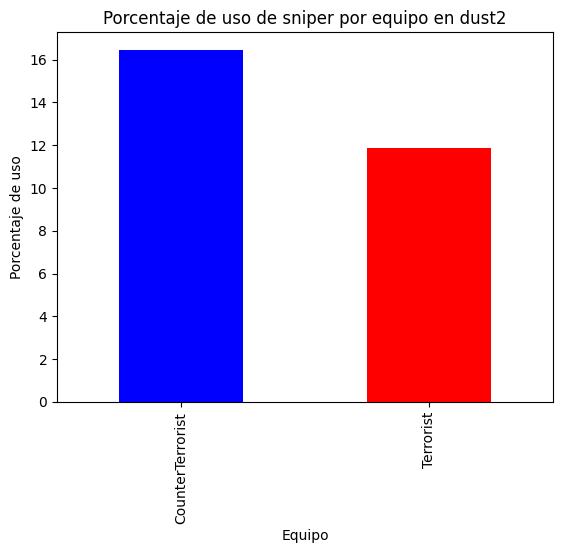

In [11]:
# Equipo que mas uso el sniper en el mapa de_dust2
dust2 = column_select[column_select["Map"] == "de_dust2"]
dust2 = dust2.groupby("Team")["PrimarySniperRifle"].mean()
dust2 = dust2 * 100
dust2

# Graficamos el porcentaje de uso de sniper por equipo en el mapa de_dust2
set_color = ["blue", "red"]
dust2.plot(kind="bar", color=set_color)
plt.title("Porcentaje de uso de sniper por equipo en dust2")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Equipo")
plt.show()


**Respuesta:** El sniper es más utilizado en el mapa **"de_dust2"** y el equipo que más la suele utilizar en aquel mapa es el **"CounterTerrorist"**

## Pregunta 3:
* ¿Cual es el mapa más jugado y que arma se utiliza más en el por cada equipo?

In [12]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']]
# Obtenemos la cantidad de veces que se jugo en cada mapa
map_count = column_select.groupby("Map").size()
# Total de veces que se jugo
total = map_count.sum()

# Obtenemos el porcentaje de veces que se jugo en cada mapa
map_count = map_count / total * 100
map_count = map_count.round(2)
map_count

# Promedio de uso de armas por mapa
wp_prom = column_select.groupby("Map")[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()
# Lo convertimos a porcentaje
wp_prom = (wp_prom * 100).round(2)
wp_prom


,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol
Map,,,,,
de_dust2,63.02,14.17,0.29,0.55,21.96
de_inferno,71.51,5.60,0.80,0.92,21.17
de_mirage,64.93,10.65,0.45,0.67,23.30
de_nuke,69.28,6.24,0.82,0.49,23.17


Text(0, 0.5, '')

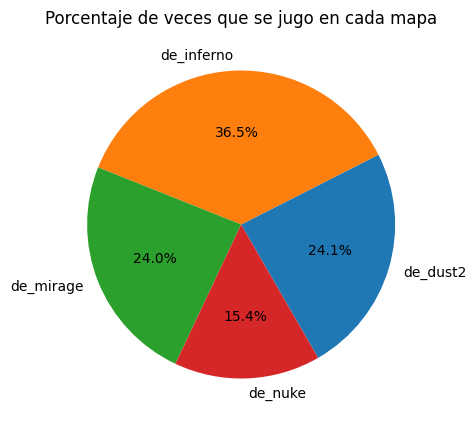

In [13]:
# Crear gráfico de torta para mostrar el porcentaje de veces que se jugo en cada mapa
map_count.plot(kind="pie", figsize=(5, 5), autopct='%1.1f%%', shadow=False, startangle=300)
plt.title("Porcentaje de veces que se jugo en cada mapa")
plt.ylabel("")

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

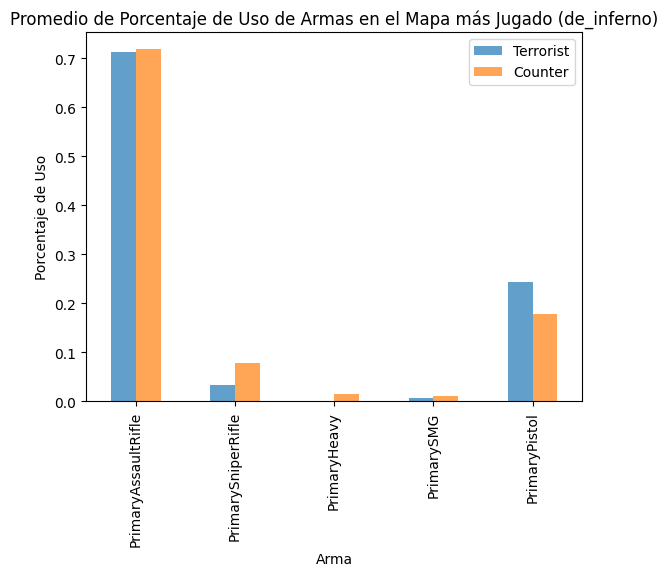

In [14]:
# Encuentra el mapa más jugado
mapa_mas_jugado = data_frame['Map'].value_counts().idxmax()

# Filtra el DataFrame para obtener solo las filas correspondientes al mapa más jugado
df_mapa_mas_jugado = data_frame[data_frame['Map'] == mapa_mas_jugado]

# Calcula el promedio de porcentaje de uso de cada arma para el equipo Terrorist y el equipo CounterTerrorist en el mapa más jugado
promedio_porcentaje_armas_terrorist = df_mapa_mas_jugado[df_mapa_mas_jugado['Team'] == 'Terrorist'][['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()
promedio_porcentaje_armas_counter = df_mapa_mas_jugado[df_mapa_mas_jugado['Team'] == 'CounterTerrorist'][['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].mean()

# Crear un gráfico de barras dobles para mostrar el promedio de uso de cada arma para cada equipo en el mapa más jugado
plt.figure(figsize=(10, 6))
index = promedio_porcentaje_armas_terrorist.index


promedios_combinados = pd.concat([promedio_porcentaje_armas_terrorist, promedio_porcentaje_armas_counter], axis=1)
promedios_combinados.columns = ['Terrorist', 'Counter']

# Crea un gráfico de barras dobles utilizando .plot()
plt.figure(figsize=(10, 6))
promedios_combinados.plot(kind='bar', alpha=0.7)

plt.title(f"Promedio de Porcentaje de Uso de Armas en el Mapa más Jugado ({mapa_mas_jugado})")
plt.xlabel("Arma")
plt.ylabel("Porcentaje de Uso")
plt.legend(["Terrorist", "Counter"])
plt.show()


**Respuesta:** El mapa más jugado es el mapa **"de_inferno"** y la arma más utilzada es **"PrimaryAssaultRifle"**, tanto por Terrorist como por CounterTerrorist

## Pregunta 4
* ¿Cuál es la arma menos ocupada en general y que equipo suele llevarla más a menudo?

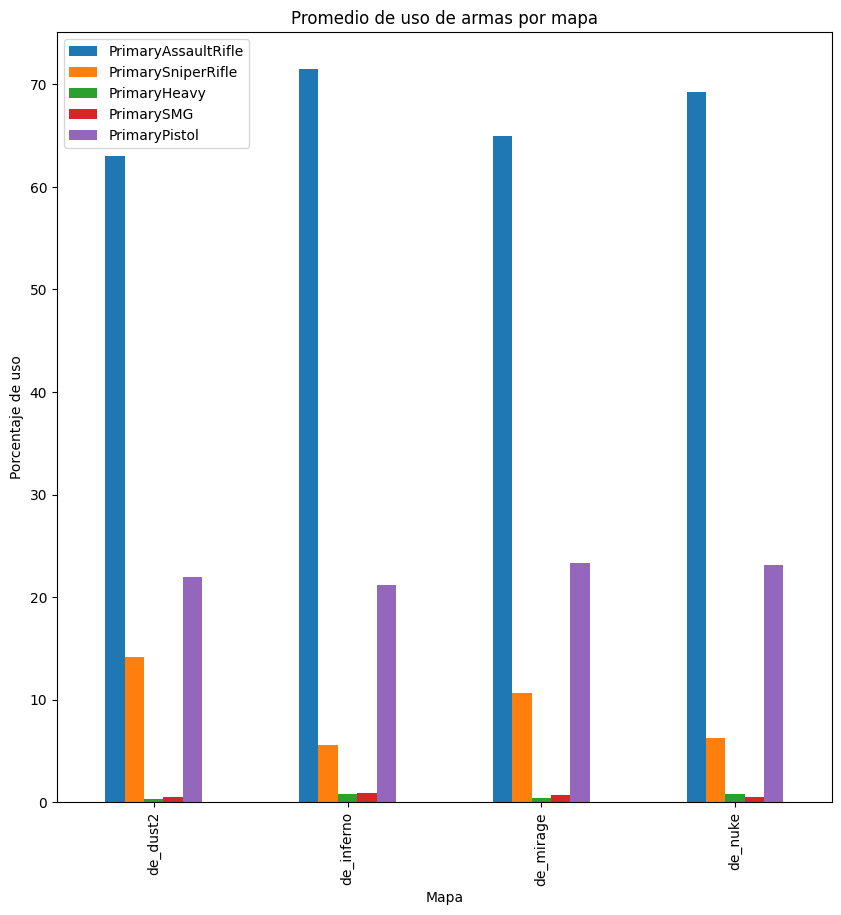

In [15]:
# Graficamos el porcentaje de uso de armas por mapa, con una barra diferente para cada arma
wp_prom.plot(kind="bar", stacked=False, figsize=(10, 10))
plt.title("Promedio de uso de armas por mapa")
plt.ylabel("Porcentaje de uso")
plt.xlabel("Mapa")
plt.show()

In [16]:
# Mostrar la arma menos utilizada de manera genera.ljust
wp_prom_num = wp_prom.sum()
wp_prom_num

PrimaryAssaultRifle    268.74
PrimarySniperRifle      36.66
PrimaryHeavy             2.36
PrimarySMG               2.63
PrimaryPistol           89.60
dtype: float64

Podemos ver que la arma menos utilizada a nivel general es la categoría **"PrimaryHeavy"**

In [18]:
wp_team = pd.DataFrame(data_frame.groupby("Team")["PrimaryHeavy"].sum())
wp_team

,PrimaryHeavy
Team,
CounterTerrorist,426.087945
Terrorist,45.970907
